# A quick look at RDataFrame

Part of the presentation on speeding up analysis code.

See `RDataFrameExercises.ipynb` for more examples.
See https://root.cern/doc/master/classROOT_1_1RDataFrame.html for documentation.

In [1]:
import ROOT 

# Just for fun, turn on multi-threaded execution.
# To turn off multi-threading, just comment out
# the line. 
ROOT.ROOT.EnableImplicitMT

# Read in the ntuple into the RDataFrame
fileName = "~seligman/root-class/experiment.root"
treeName = "tree1"
dataframe = ROOT.RDataFrame(treeName, fileName)

Welcome to JupyROOT 6.24/08


All the statements in the following cell are either Actions or Transformations. They don't actually affect the dataframe or read the ROOT file at this point. These actions are staged using a technique called "lazy evaluation": nothing actually happens until a concrete result is needed. 

In [2]:
# Add a new column: pt
ptDataFrame = dataframe.Define("pt","sqrt(px*px + py*py)")

# Add yet another new column: theta
thetaDataFrame = ptDataFrame.Define("theta","atan2(pt,pz)") 

# Apply a cut:
cutDataFrame = thetaDataFrame.Filter("pz < 145")

# Make a histogram. Note how it depends on a new column we've defined.
thetaHistogram = thetaDataFrame.Histo1D("theta")

# Make the same histogram, but with the cut we defined above:
thetaWithCutHistogram = cutDataFrame.Histo1D("theta")

*Except:* No one uses RDataFrames line-by-line unless what they're doing is so confusing that breaking up the steps into separate commands helps you to understand what's going on, or they're creating multiple histograms. This is what people do:

In [3]:
derived = dataframe.Define("pt","sqrt(px*px + py*py)") \
    .Define("theta","atan2(pt,pz)") \
    .Define("emeas","sqrt(px*px + py*py + pz*pz)") \
    .Define("eloss","ebeam - emeas")

thetaHistogram = derived.Histo1D("theta")
thetaWithCutHistogram = derived.Filter("pz < 145").Histo1D("theta")

We still haven't actually read the ntuple yet! Now we're about, because we're finally going to request a concrete value or result from the dataframe. 

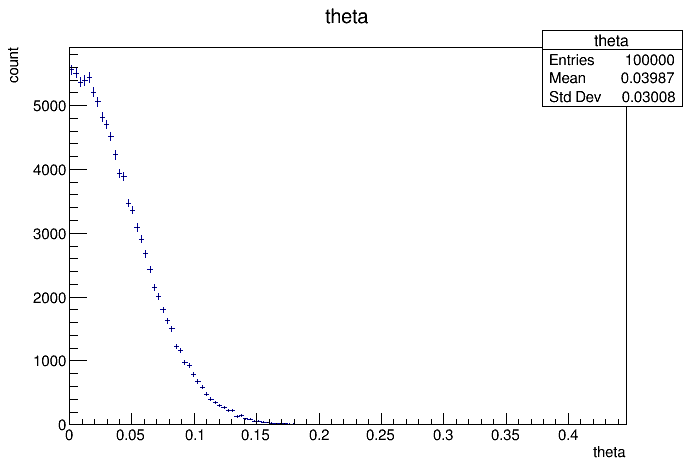

In [4]:
# Define a blank canvas for drawing the histograms.
myCanvas = ROOT.TCanvas()

# Draw a histogram onto the canvas
thetaHistogram.Draw("E")

# ... and draw the canvas so we can see it in the notebook.
myCanvas.Draw()

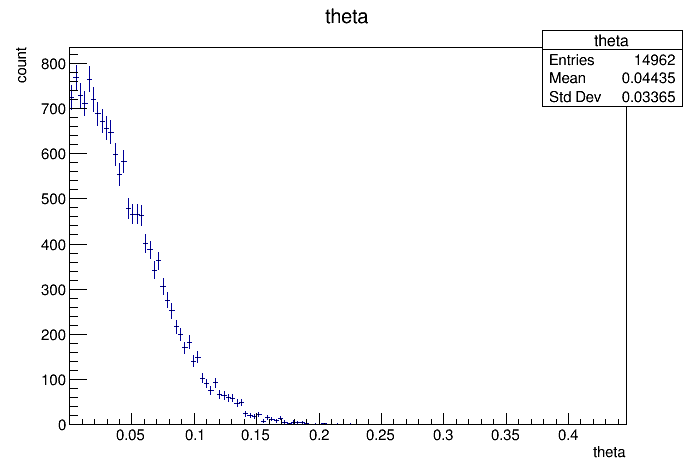

In [5]:
# Do this with the other histogram we defined.
thetaWithCutHistogram.Draw("E")
myCanvas.Draw()